In [94]:
from PIL import Image
from pytesseract import pytesseract

path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
path_A = r"E:\hacktiv8\ftds009\tugas\phase_2\OCR\A.png"
path_B = r"E:\hacktiv8\ftds009\tugas\phase_2\OCR\B.png"
path_noise = r"E:\hacktiv8\ftds009\tugas\phase_2\OCR\download.jfif"

In [95]:
noise = Image.open(path_noise)

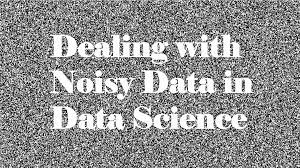

In [96]:
display(noise)

In [97]:
pytesseract.image_to_string(noise)

''

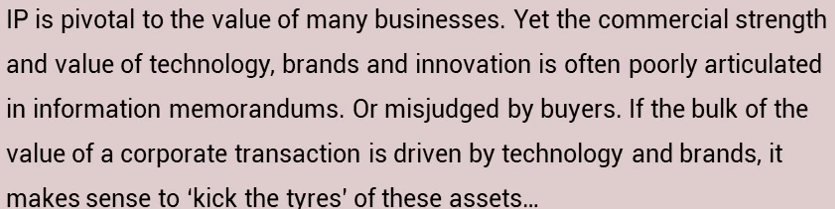

In [90]:
from PIL import Image
from pytesseract import pytesseract
pytesseract.tesseract_cmd = path_to_tesseract

img_A = Image.open(path_A)
display(img_A)

In [77]:
print(pytesseract.image_to_string('A.png'))

IP is pivotal to the value of many businesses. Yet the commercial strength
and value of technology, brands and innovation is often poorly articulated
in information memorandums. Or misjudged by buyers. If the bulk of the
value of a corporate transaction is driven by technology and brands, it

makes sense to ‘kick the tyres’ of these assets...



In [91]:
pdf = pytesseract.image_to_pdf_or_hocr('A.png', extension='pdf')
with open('A.pdf', 'w+b') as f:
    f.write(pdf)

In [83]:
import os
os.path.split(os.path.split(path_A)[0])[1]

'OCR'

In [74]:
text_A = pytesseract.image_to_string(img_A)
print(text_A)

IP is pivotal to the value of many businesses. Yet the commercial strength
and value of technology, brands and innovation is often poorly articulated
in information memorandums. Or misjudged by buyers. If the bulk of the
value of a corporate transaction is driven by technology and brands, it

makes sense to ‘kick the tyres’ of these assets...



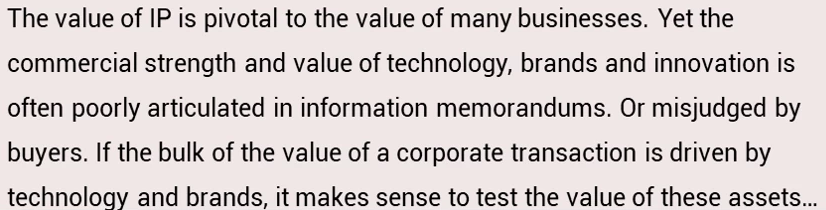

The value of IP is pivotal to the value of many businesses. Yet the
commercial strength and value of technology, brands and innovation is
often poorly articulated in information memorandums. Or misjudged by
buyers. If the bulk of the value of a corporate transaction is driven by

technology and brands, it makes sense to test the value of these assets...



In [20]:
img_B = Image.open(path_B)
display(img_B)
pytesseract.tesseract_cmd = path_to_tesseract
text_B = pytesseract.image_to_string(img_B)
print(text_B)

In [23]:
text_A

'IP is pivotal to the value of many businesses. Yet the commercial strength\nand value of technology, brands and innovation is often poorly articulated\nin information memorandums. Or misjudged by buyers. If the bulk of the\nvalue of a corporate transaction is driven by technology and brands, it\n\nmakes sense to ‘kick the tyres’ of these assets...\n'

In [25]:
text_A = text_A.replace('\n', ' ')
text_A

'IP is pivotal to the value of many businesses. Yet the commercial strength and value of technology, brands and innovation is often poorly articulated in information memorandums. Or misjudged by buyers. If the bulk of the value of a corporate transaction is driven by technology and brands, it  makes sense to ‘kick the tyres’ of these assets...'

In [26]:
text_B = text_B.replace('\n', ' ')
text_B

'The value of IP is pivotal to the value of many businesses. Yet the commercial strength and value of technology, brands and innovation is often poorly articulated in information memorandums. Or misjudged by buyers. If the bulk of the value of a corporate transaction is driven by  technology and brands, it makes sense to test the value of these assets... '

In [27]:
corpus = text_A + text_B
corpus

'IP is pivotal to the value of many businesses. Yet the commercial strength and value of technology, brands and innovation is often poorly articulated in information memorandums. Or misjudged by buyers. If the bulk of the value of a corporate transaction is driven by technology and brands, it  makes sense to ‘kick the tyres’ of these assets...The value of IP is pivotal to the value of many businesses. Yet the commercial strength and value of technology, brands and innovation is often poorly articulated in information memorandums. Or misjudged by buyers. If the bulk of the value of a corporate transaction is driven by  technology and brands, it makes sense to test the value of these assets... '

In [29]:
vectorizer = CountVectorizer()
vec_corpus = vectorizer.fit_transform([corpus])

In [30]:
print(vectorizer.vocabulary_)

{'ip': 15, 'is': 16, 'pivotal': 26, 'to': 34, 'the': 32, 'value': 37, 'of': 23, 'many': 20, 'businesses': 5, 'yet': 38, 'commercial': 8, 'strength': 29, 'and': 0, 'technology': 30, 'brands': 3, 'innovation': 14, 'often': 24, 'poorly': 27, 'articulated': 1, 'in': 12, 'information': 13, 'memorandums': 21, 'or': 25, 'misjudged': 22, 'by': 7, 'buyers': 6, 'if': 11, 'bulk': 4, 'corporate': 9, 'transaction': 35, 'driven': 10, 'it': 17, 'makes': 19, 'sense': 28, 'kick': 18, 'tyres': 36, 'these': 33, 'assets': 2, 'test': 31}


In [69]:
vocab = pd.DataFrame([vectorizer.vocabulary_]).T.reset_index(drop=False)
vocab.sort_values(by=0, inplace=True)
vocab

,index,0
12,and,0
18,articulated,1
37,assets,2
14,brands,3
27,bulk,4
8,businesses,5
25,buyers,6
24,by,7
10,commercial,8
28,corporate,9


In [60]:
vec_A = vectorizer.transform([text_A]).toarray().flatten()
print(vec_A)
vec_B = vectorizer.transform([text_B]).toarray().flatten()
print(vec_B)

[3 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 5 1 1 1 1 1 1 2 0 5 1 2 1 1
 3 1]
[3 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 3 1 0 1 1 1 1 6 1 1 1 1 1 1 2 1 6 1 2 1 0
 5 1]


In [63]:
import numpy as np
np.dot(vec_A, vec_B)/(np.linalg.norm(vec_A)*np.linalg.norm(vec_B))

0.9764734306994453

In [61]:
vec_A.shape, vec_B.shape

((39,), (39,))

In [56]:
type(vec_A), type(vec_B)

(numpy.ndarray, numpy.ndarray)

In [59]:
kal_1 = np.array([2,1,1,1,1,0])
kal_2 = np.array([2,1,1,1,0,1])

type(kal_1), type(kal_2)

kal_1.shape, kal_2.shape

((6,), (6,))

0.9764734306994453

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse._csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [17]:
vecA = [text_A]
vecA

['IP DUE DILIGENCE HELPS YOU PICK THE WINNERS\n\nFIRMA\nIP is pivotal to the value of many businesses. Yet the commercial strength\n\nand value of technology, brands and innovation is often poorly articulated\nin information memorandums. Or misjudged by buyers. If the bulk of the\nvalue of a corporate transaction is driven by technology and brands, it\n\nmakes sense to ‘kick the tyres’ of these assets...\n']

In [16]:
vectorizer.transform([text_A])

<1x8 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>